# Pregunta 2 
## parte 1

### Importaciones

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats

#### Diccionario de configuraciones
Ver [seaborn.plotting_context](https://seaborn.pydata.org/generated/seaborn.plotting_context.html) para mayor información.

In [33]:
dicc_context = {
    'font.size': 16.0,
    'axes.labelsize': 18.0,
    'axes.titlesize': 18.0,
    'xtick.labelsize': 16.5,
    'ytick.labelsize': 16.5,
    'legend.fontsize': 16.5,
    'axes.linewidth': 1.25,
    'grid.linewidth': 1.0,
    'lines.linewidth': 1.5,
    'lines.markersize': 6.0,
    'patch.linewidth': 1.0,
    'xtick.major.width': 1.25,
    'ytick.major.width': 1.25,
    'xtick.minor.width': 1.0,
    'ytick.minor.width': 1.0,
    'xtick.major.size': 6.0,
    'ytick.major.size': 6.0,
    'xtick.minor.size': 4.0,
    'ytick.minor.size': 4.0
}

cont = sns.plotting_context(dicc_context)

#### Función de formato

Ocupa la función [seaborn.set](https://seaborn.pydata.org/generated/seaborn.set.html)

In [34]:
def formato():
    sns.set(
        context=cont,
        style='whitegrid',
        palette='deep',
    )
    return None

#### Prueba

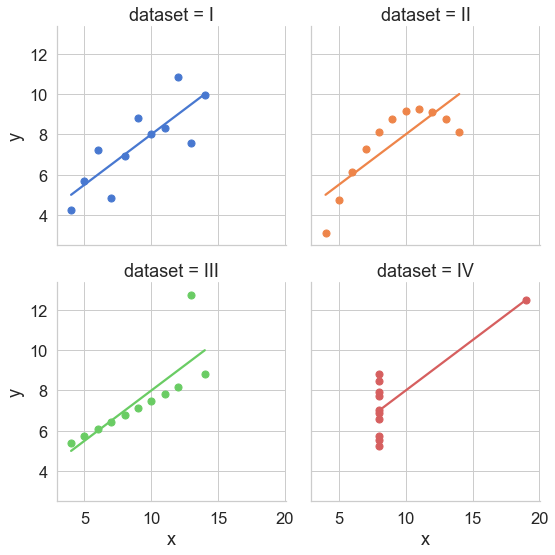

In [35]:
formato()
df = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [36]:
###### PARTE 2
# Se importa el modulo con los paths de archivos
from paths import *

In [37]:
# Cargar datos limpiados de la parte 1
df= pd.read_csv(path_csv_limpio)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13917 entries, 0 to 13916
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               13917 non-null  int64  
 1   property_type|rent_type|location         13917 non-null  object 
 2   price_$                                  13917 non-null  int64  
 3   n_rooms                                  13889 non-null  object 
 4   n_bath                                   13779 non-null  object 
 5   surface_m2                               13917 non-null  float64
 6   details                                  13879 non-null  object 
 7   url                                      13917 non-null  object 
 8   metrocuadrado_index                      13917 non-null  float64
 9   furnished                                13917 non-null  int64  
 10  tipo_de_inmueble                         13917

In [39]:
object_type_set = [col for col in df.columns if df[col].dtype == 'O']

In [40]:
df = df.astype({col:'str' for col in object_type_set})

In [41]:
names = ['numeric', 'categorical']

# Se crea una lista con las columnas numericas

numeric_continuas = ['metrocuadrado_index','densidad','adultos_mayores_pobres_perc','jefe_mujer_perc','indice_envegecimiento',
           'price_$','surface_m2','price_per_m2_$/m2',
           'Indice_inseguridad','areas_verdes_perc','jovenes_14_24_anos_nini_perc','trabajoinfampliado_ninos_5_17_anos_perc',
           'trabajoinf_ninos_5_17_anos_perc']

numeric_discretas=['n_rooms','n_bath','garajes','personas'] 

strings=['url','upz_codigo']


# Se crea una lista con las columnas categoricas
categorical = list(set(df.columns) - set(numeric_continuas)-set(numeric_discretas)-set(strings))

mapping = [('numeric_continuas', col) for col in numeric_continuas]

mapping.extend([('categorical', col) for col in categorical])

mapping.extend([('numeric_discretas', col) for col in numeric_discretas])

mapping.extend([('strings', col) for col in strings])

In [42]:
df = df.reindex(columns=numeric_continuas + categorical+numeric_discretas+strings)

In [43]:
# Se reasignan las columnas
df.columns = pd.MultiIndex.from_tuples(mapping)
df

numeric_continuas                                          \
      metrocuadrado_index    densidad adultos_mayores_pobres_perc   
0                    55.9   42.796635                    3.840225   
1                    28.7  191.831725                    6.688596   
2                    38.8   50.457441                   14.005861   
3                    49.8   42.796635                    3.840225   
4                    29.0   91.811195                   16.182676   
...                   ...         ...                         ...   
13912                73.7   79.780854                    5.401917   
13913                64.2   39.843848                    3.840225   
13914                55.4   79.780854                    5.401917   
13915                59.1   39.843848                    3.840225   
13916                68.9   49.729352                    2.615948   

                                                                 \
      jefe_mujer_perc indice_envegecimiento  price_$ surface_m2   
0           38.443910                 127.3  2700000       90.0   
1           26.367889                  24.7  1500000       90.0   
2           38.518565                  62.1  1300000       90.0   
3           38.443910                 127.3  1800000      100.0   
4           40.729156                  91.2   850000       84.0   
...               ...                   ...      ...        ...   
13912       44.667815                 153.4  5000000      115.0   
13913       38.443910                 127.3  4390000      110.0   
13914       44.667815                 153.4  4500000      120.0   
13915       38.443910                 127.3  4100000      114.0   
13916       39.046371                  70.5  3800000      107.0   

                                                              ... categorical  \
      price_per_m2_$/m2 Indice_inseguridad areas_verdes_perc  ...  Unnamed: 0   
0              30000.00           2.505219         45.988424  ...           0   
1              16666.67          11.157025         32.151794  ...           1   
2              14444.44           2.240896         26.057273  ...           2   
3              18000.00           2.505219         45.988424  ...           3   
4              10119.05           3.383459         18.205454  ...           4   
...                 ...                ...               ...  ...         ...   
13912          43478.26           2.047782         20.901367  ...       13912   
13913          39909.09           1.161103         25.466350  ...       13913   
13914          37500.00           2.047782         20.901367  ...       13914   
13915          35964.91           1.161103         25.466350  ...       13915   
13916          35514.02           3.794038         39.319972  ...       13916   

                                                                           \
      tipo_de_inmueble                                            details   
0                 Casa  La ubicación exacta de la propiedad no se publ...   
1                 Casa  Excelente Jardin, Parqueadero interno a la cas...   
2                 Casa  Entrada con puerta metalica, sala comedor, coc...   
3                 Casa  Casa muy bien ubicada, amplia con opción para ...   
4                 Casa  Oportunidad casa No  Conjunto Residencial Lago...   
...                ...                                                ...   
13912      Apartamento  Lindo apartamento amoblado, ubicado en un sect...   
13913      Apartamento                              amoblado con terraza.   
13914      Apartamento  Lindo apto en el sector de Chico Virrey, cerca...   
13915      Apartamento  Hermoso apto, rodeado de verde por todos lados...   
13916      Apartamento  MAGNIFICO APARTAMENTO DUPLEX AMOBLADO, A DOS C...   

                     numeric_discretas                          \
      tipo_de_oferta           n_rooms n_bath garajes personas   
0           Arriendo                 2      2     

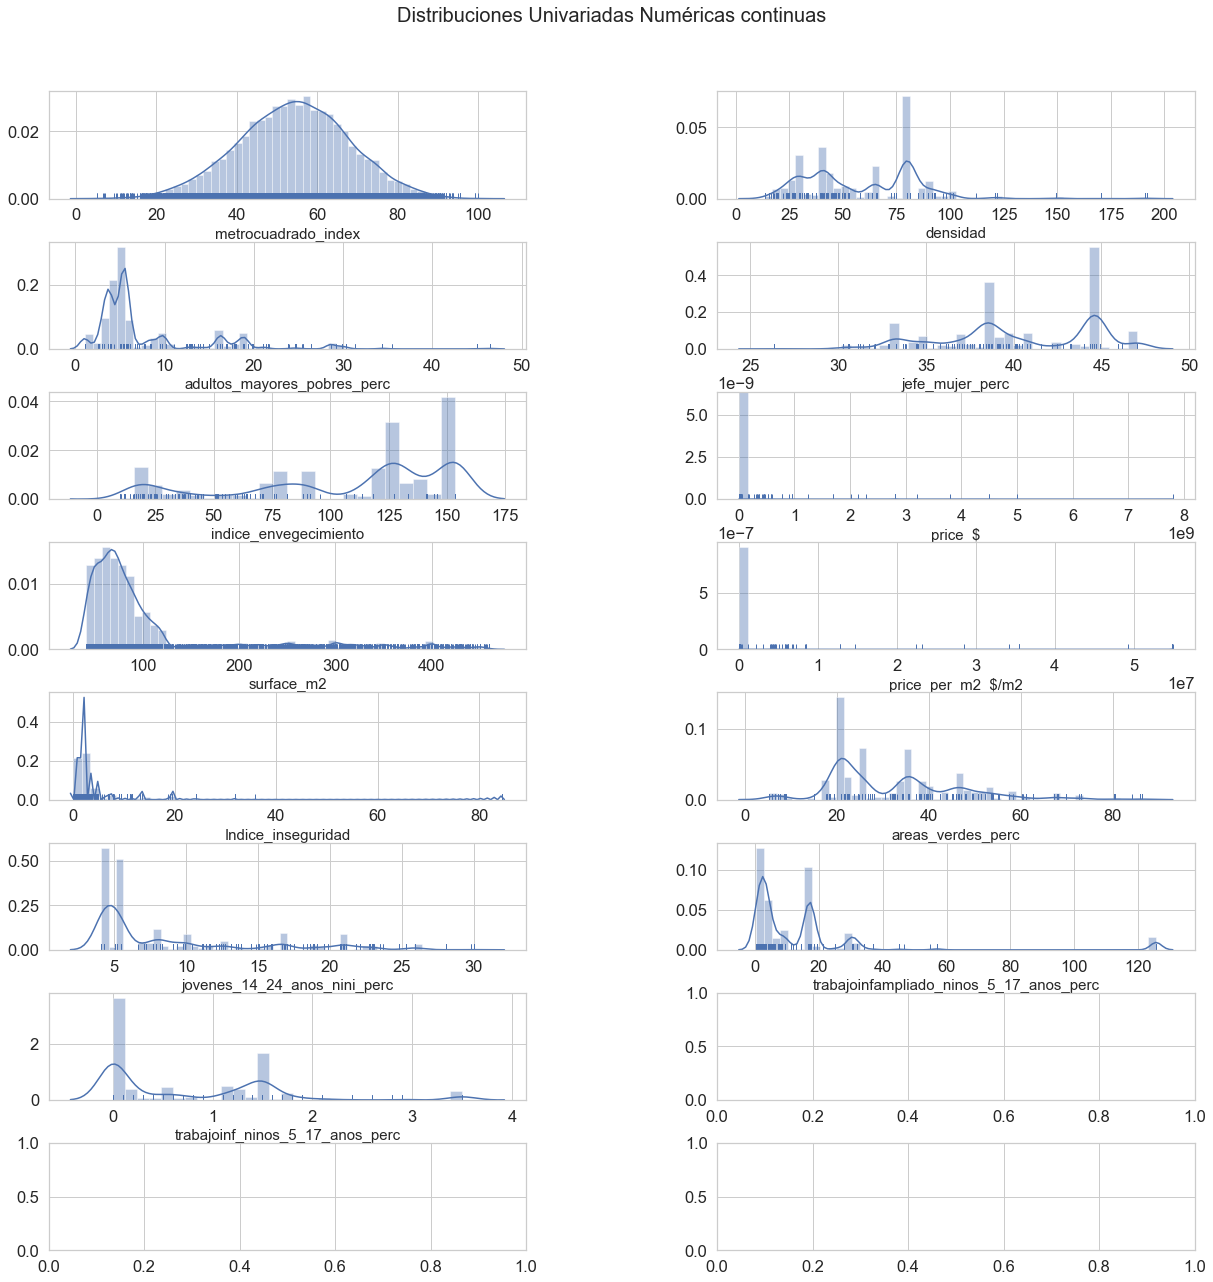

In [44]:
##### YA con el data reindexado, se proceden a obtener estadisticos de estos mismos
# para las variables numericas 

fig, ax = plt.subplots(nrows=8, ncols=2, figsize=[17, 17])

fig.tight_layout()
fig.suptitle('Distribuciones Univariadas Numéricas continuas',
             fontsize=20,
             x=0.5,
             y=1.05)

for axis, col in zip(ax.flatten(), numeric_continuas):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric_continuas', col)], ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric_continuas', col)], ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

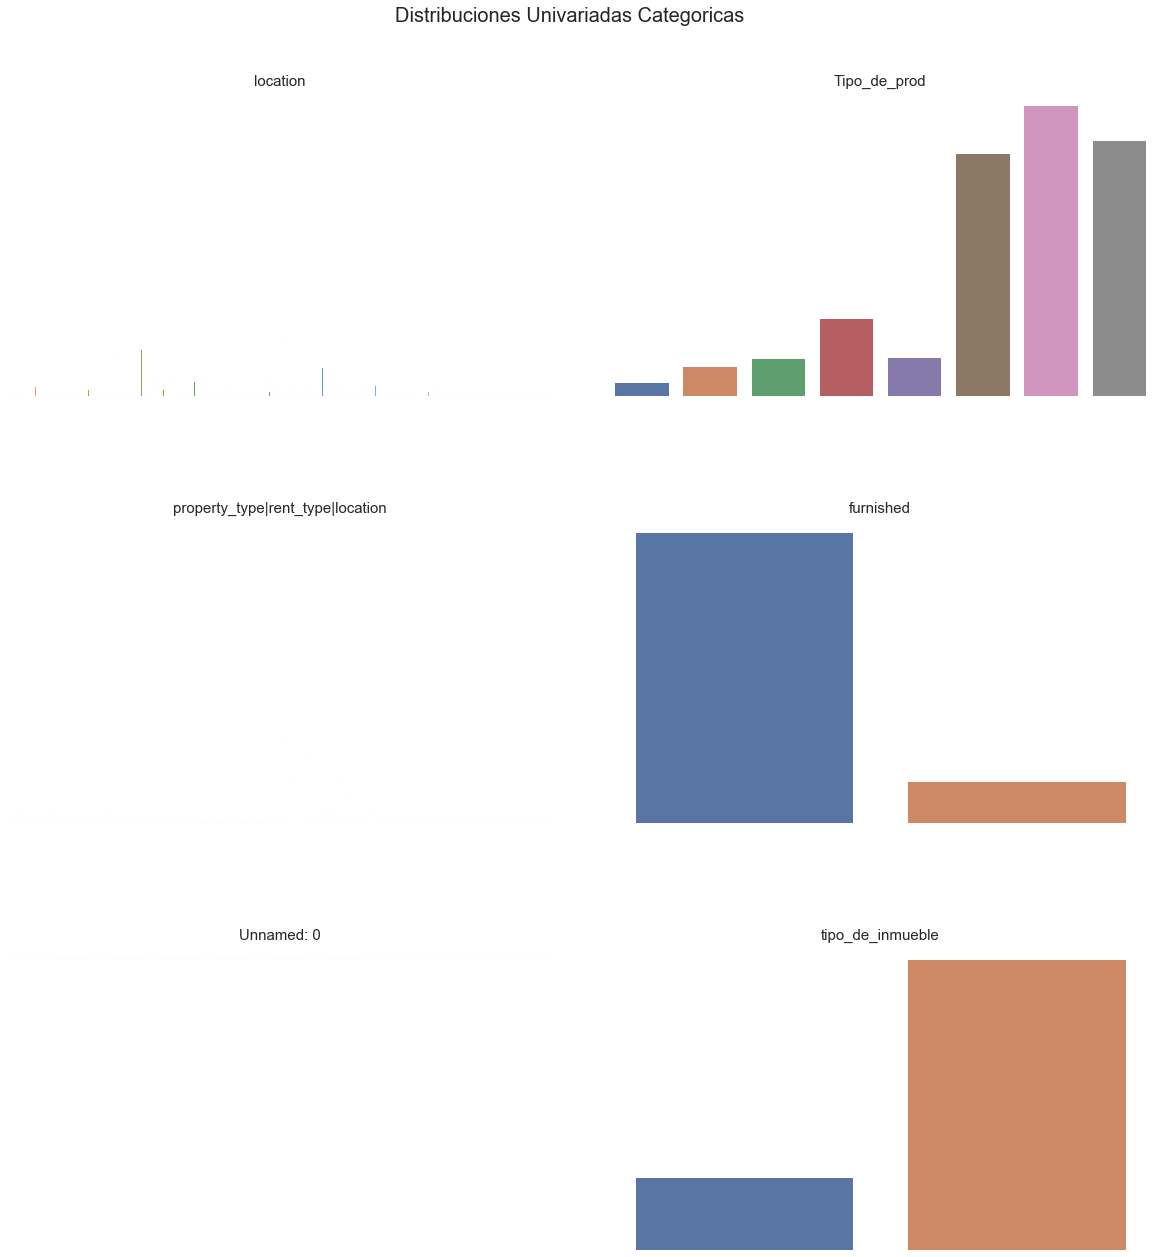

In [45]:
# Para las variables catogoricas 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[17, 17])
fig.tight_layout()

fig.suptitle('Distribuciones Univariadas Categoricas',fontsize=20, x=0.5, y=1.05)

for axis, col in zip(ax.flatten(), categorical):
    try:
        sns.countplot(df[('categorical',col)], ax=axis)
    except: None
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
    axis.set_xlabel(col, fontsize=15)

h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

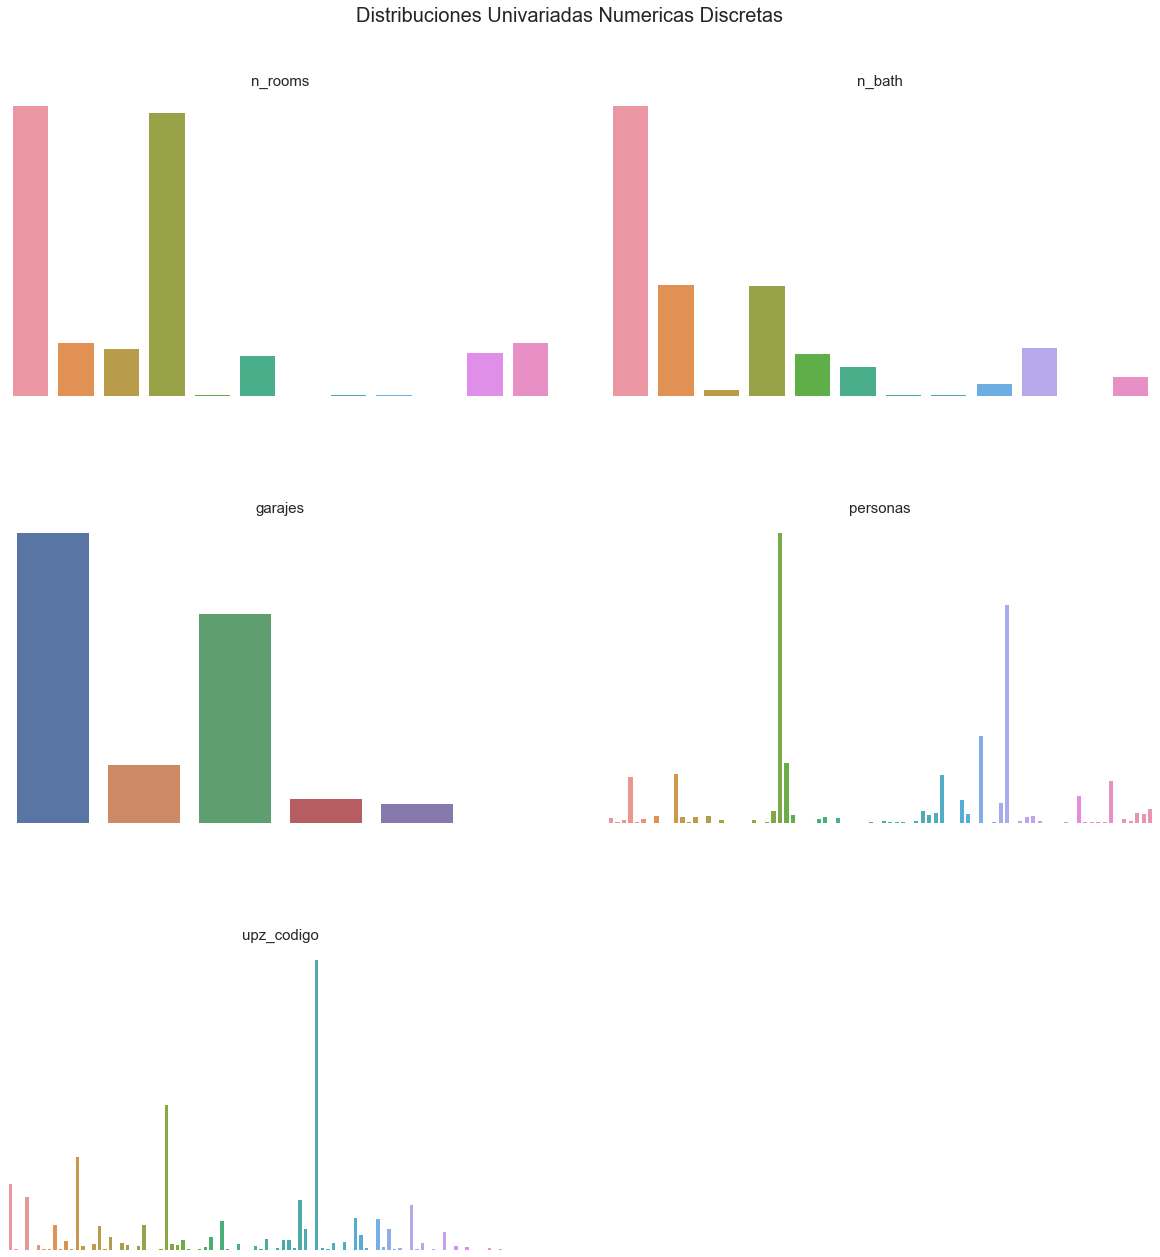

In [46]:
# PARA las variables numericas discretas, con upz agregada

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[17, 17])
fig.tight_layout()

fig.suptitle('Distribuciones Univariadas Numericas Discretas',
             fontsize=20,
             x=0.5,
             y=1.05)
list(map(lambda a : a.remove(), ax[-1,-1:]))

strings=['url','upz_codigo']
aux=strings
aux.remove('url')

numeric_aux=numeric_discretas+aux

for axis, col in zip(ax.flatten(), numeric_aux):
    try:
        sns.countplot(df[('numeric_discretas',col)], ax=axis)
    except:
        sns.countplot(df[('strings',col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
    axis.set_xlabel(col, fontsize=15)
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [47]:
def indexer(cols, t_c = df.columns):
    '''Genera columnas multinivel a partir de nombres de columna planos.'''
    
    set_to_tuple = set(*[cols])

    tuples = [
        i for i in t_c if set_to_tuple.intersection(set(i))
    ]
    return tuples

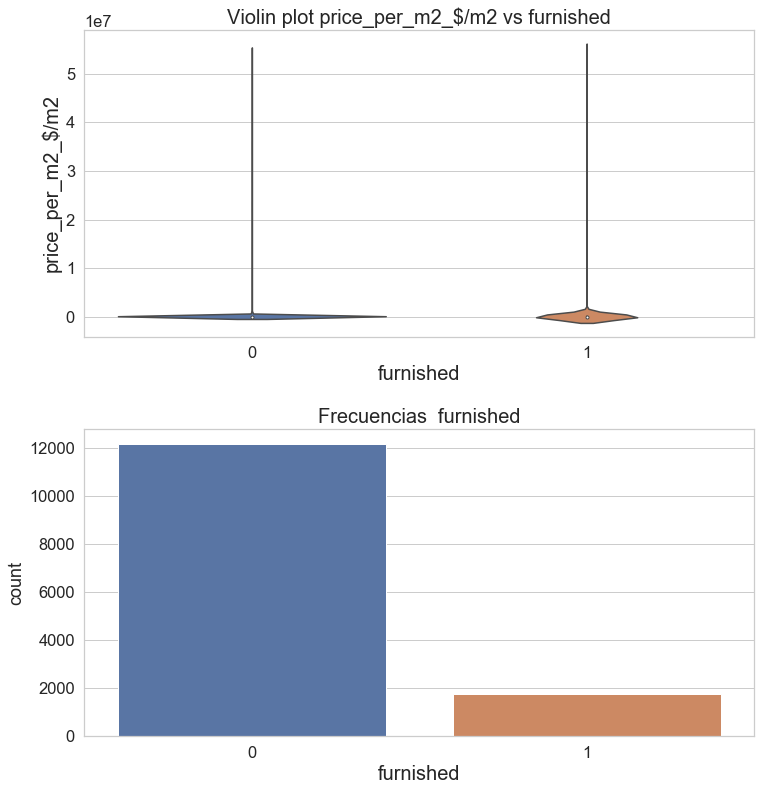

In [48]:
### se obtiene plots de variables categoricas interesantes

fontdict = {'fontsize':20}
fig, ax = plt.subplots(2,1,figsize=[12,13])

sns.violinplot(('categorical',  'furnished'),
            y=('numeric_continuas', 'price_per_m2_$/m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical', 'furnished')], ax=ax[1])

ax[0].set_xlabel('furnished', fontdict)
ax[1].set_xlabel('furnished', fontdict)

ax[0].set_ylabel('price_per_m2_$/m2', fontdict)
ax[0].set_title('Violin plot price_per_m2_$/m2 vs furnished', fontdict)
ax[1].set_title('Frecuencias  furnished', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

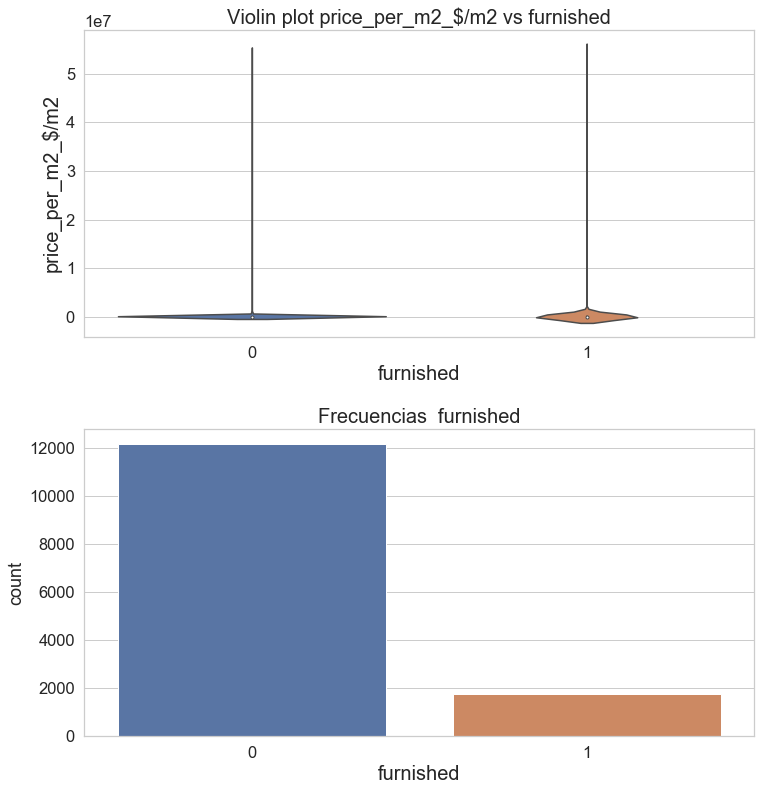

In [49]:
### se obtiene plots de variables categoricas interesantes

fontdict = {'fontsize':20}
fig, ax = plt.subplots(2,1,figsize=[12,13])

sns.violinplot(('categorical',  'furnished'),
            y=('numeric_continuas', 'price_per_m2_$/m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical', 'furnished')], ax=ax[1])

ax[0].set_xlabel('furnished', fontdict)
ax[1].set_xlabel('furnished', fontdict)

ax[0].set_ylabel('price_per_m2_$/m2', fontdict)
ax[0].set_title('Violin plot price_per_m2_$/m2 vs furnished', fontdict)
ax[1].set_title('Frecuencias  furnished', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

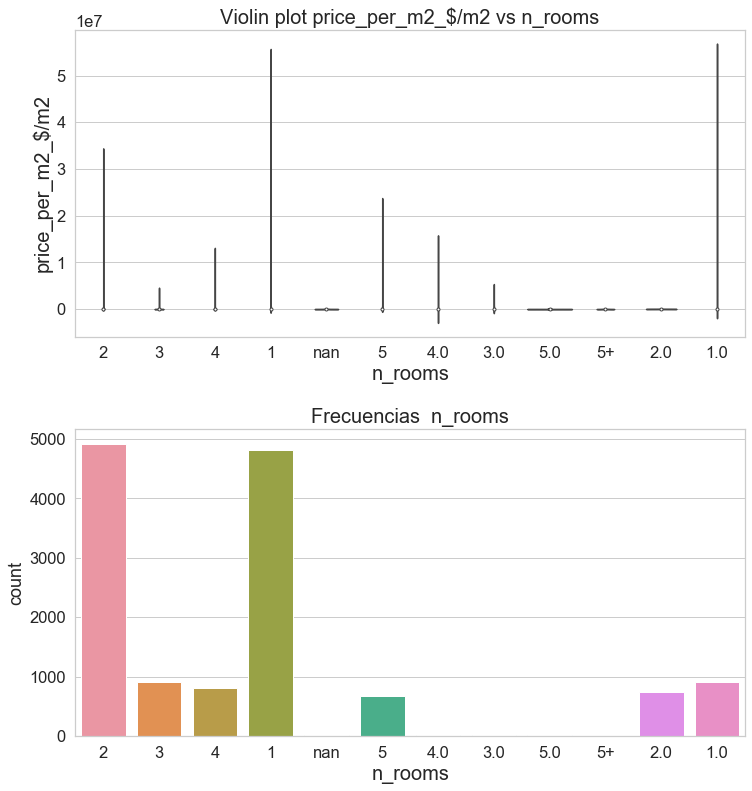

In [50]:
fontdict = {'fontsize':20}

fig, ax = plt.subplots(2,1,figsize=[12,13])

sns.violinplot(('numeric_discretas',  'n_rooms'),
            y=('numeric_continuas', 'price_per_m2_$/m2'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('numeric_discretas', 'n_rooms')], ax=ax[1])

ax[0].set_xlabel('n_rooms', fontdict)
ax[1].set_xlabel('n_rooms', fontdict)

ax[0].set_ylabel('price_per_m2_$/m2', fontdict)
ax[0].set_title('Violin plot price_per_m2_$/m2 vs n_rooms', fontdict)
ax[1].set_title('Frecuencias  n_rooms', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)
    

KeyboardInterrupt: 

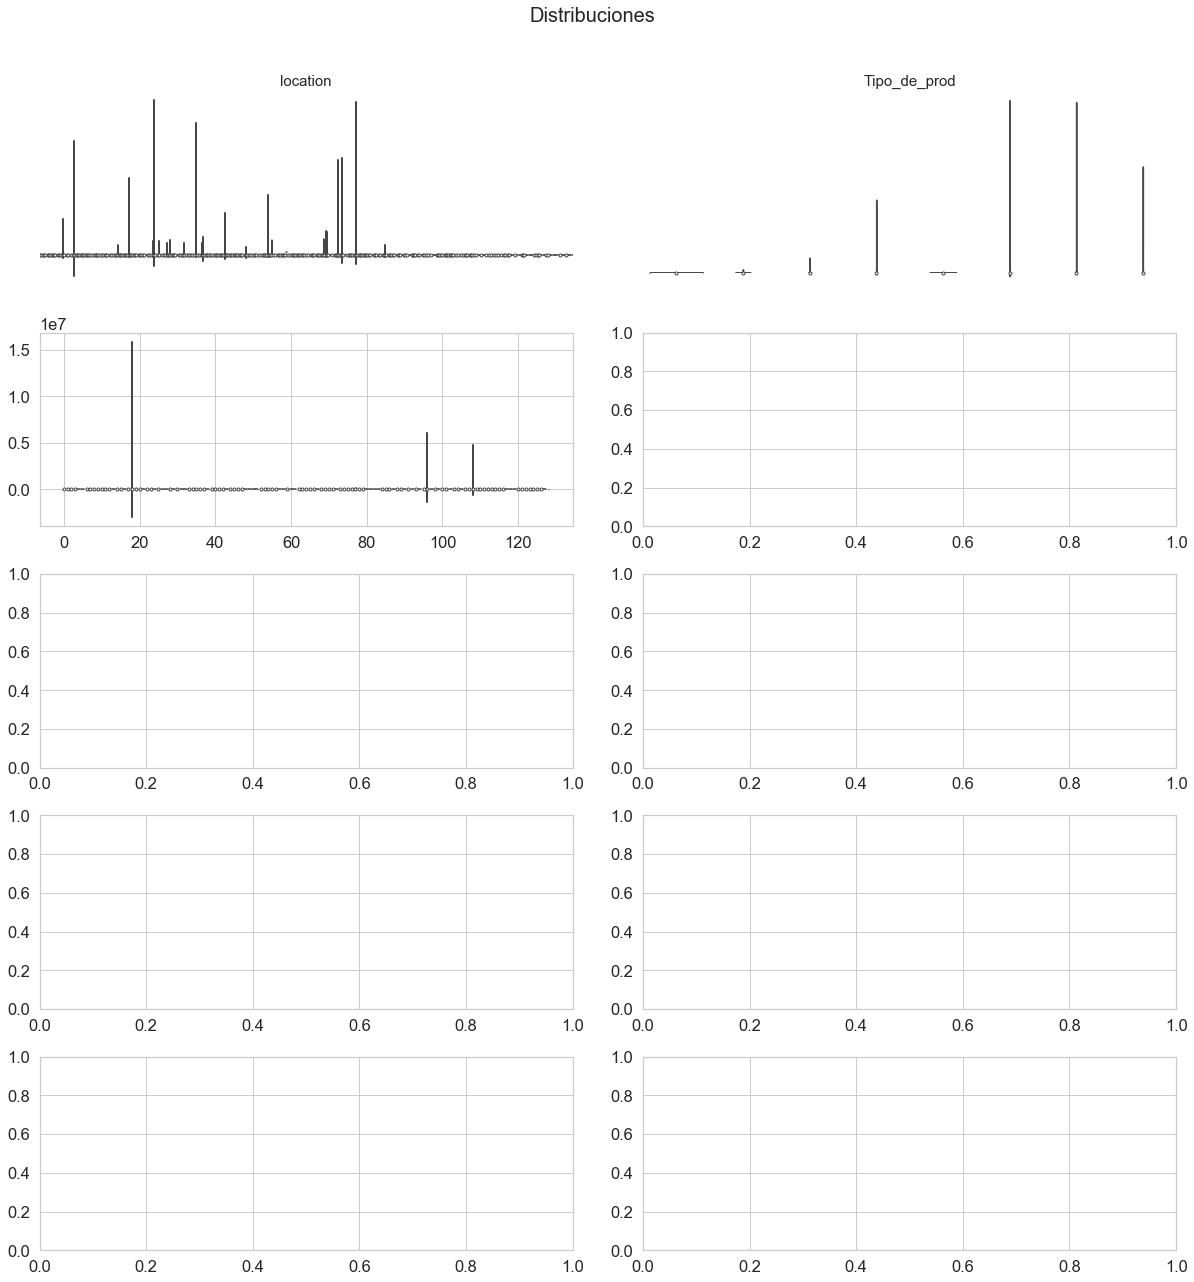

In [54]:
# no corrio
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=[17, 17])
fig.tight_layout()

fig.suptitle('Distribuciones', fontsize=20, x=0.5, y=1.05)

for axis, col in zip(ax.flatten(), categorical):
    sns.violinplot(('categorical',col), y=('numeric_continuas', 'price_per_m2_$/m2'), data=df, kind='violin', ax=axis)
    sns.countplot(df[('categorical',col)], ax=axis)

    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
    axis.set_xlabel(col, fontsize=15)

h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [ ]:
# tablas bivariada de variables continuas y categoricas
interest = numeric_continuas+categorical+aux
idxs = indexer(interest)

# se pone la variable de interes, en ultimo puesto
idxs.sort()
idxs.remove(('numeric_continuas', 'price_per_m2_$/m2'))
idxs.append(('numeric_continuas', 'price_per_m2_$/m2'))


data = df.reindex(idxs, axis=1).droplevel(0,axis=1)
sns.pairplot(data = data, diag_kind='kde')

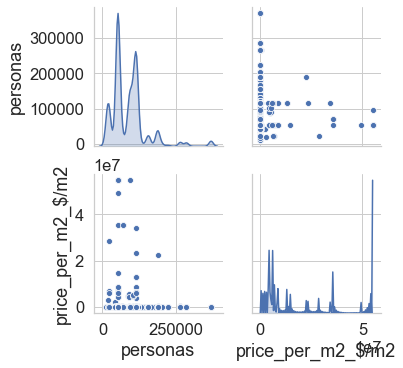

In [55]:
### tablas bivariada entre variables numericas, continuas y dicretas
interest2 = numeric_discretas + ['price_per_m2_$/m2']
idxs2 = indexer(interest2)

# se pone la variable de interes, en ultimo puesto
idxs2.sort()
idxs2.remove(('numeric_continuas', 'price_per_m2_$/m2'))
idxs2.append(('numeric_continuas', 'price_per_m2_$/m2'))

data2 = df.reindex(idxs2, axis=1).droplevel(0,axis=1)
sns.pairplot(data = data2, diag_kind='kde')

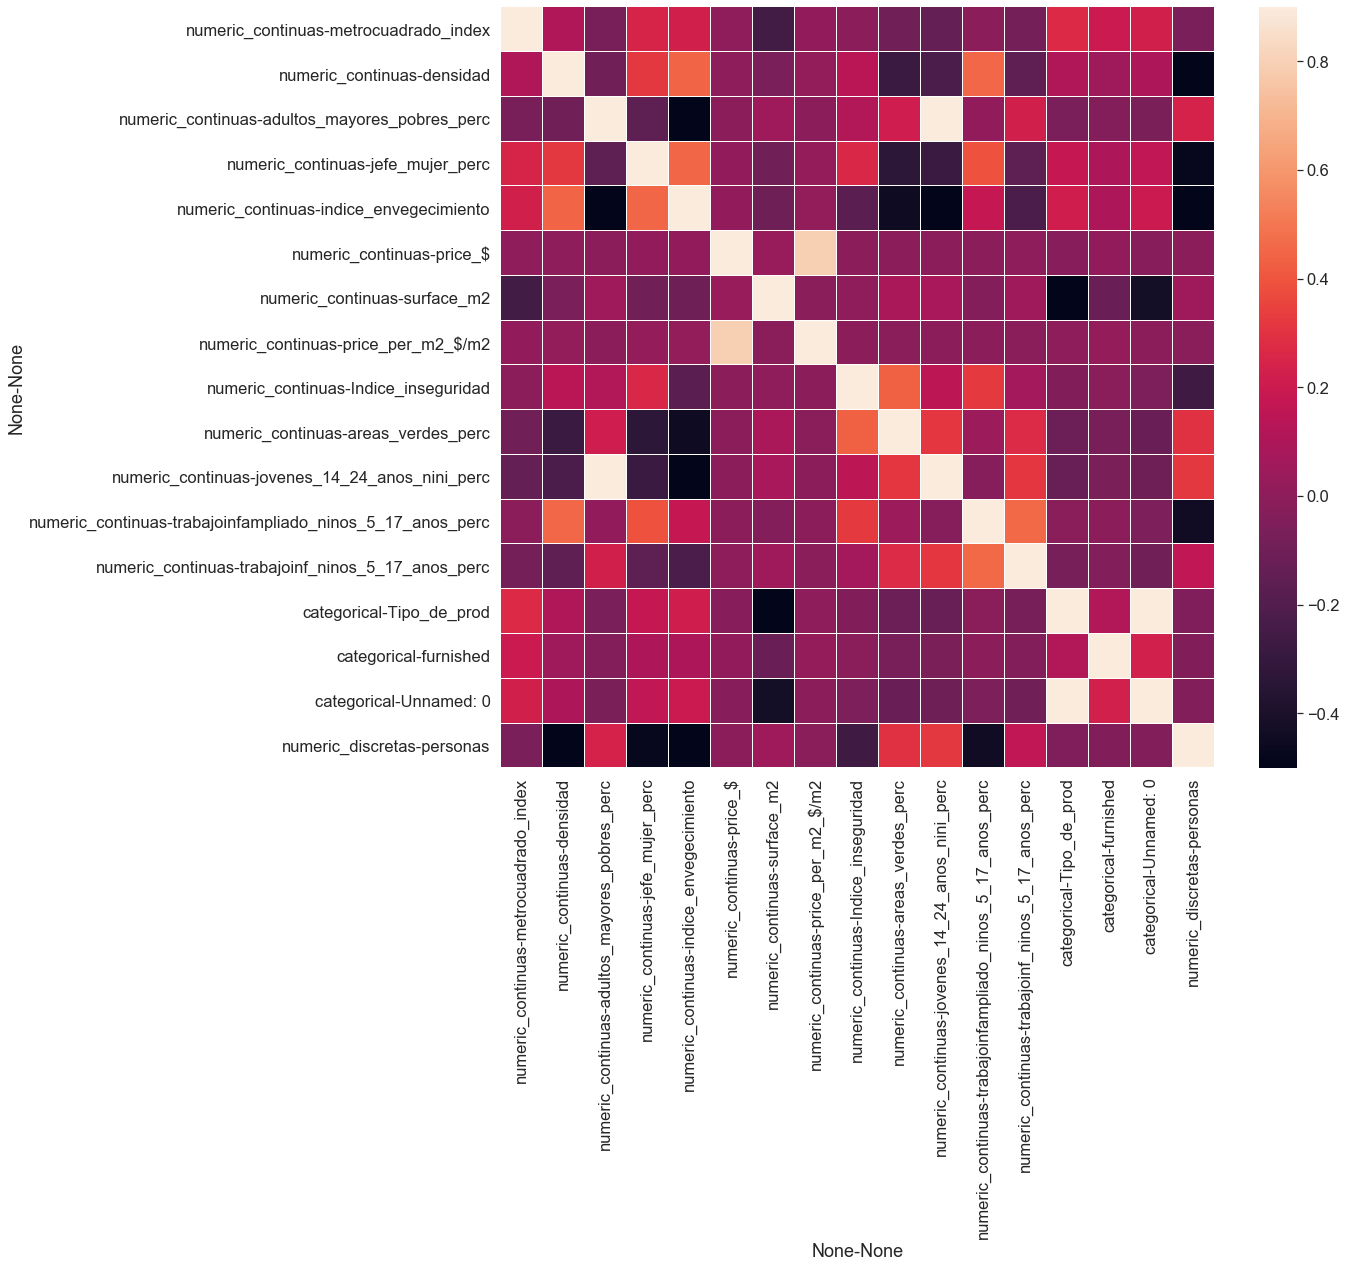

In [56]:
#### matriz de correlacion 
corrmat = df.corr()

unsorted = list(corrmat.columns)

sortd = pd.MultiIndex.from_tuples(unsorted)
corrmat = corrmat.reindex(index = sortd, columns = sortd)

fig, ax = plt.subplots(figsize=[16, 14])

sns.heatmap(corrmat, vmin=-.5, vmax=.9, linewidths=.01)

In [57]:
###### PARTE 3
import missingno as msno

# se obtienen valores faltantes

df.replace('nan',np.nan, inplace = True) 
df.isnull().sum()

ModuleNotFoundError: No module named 'missingno'

/anaconda3/lib/python3.7/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


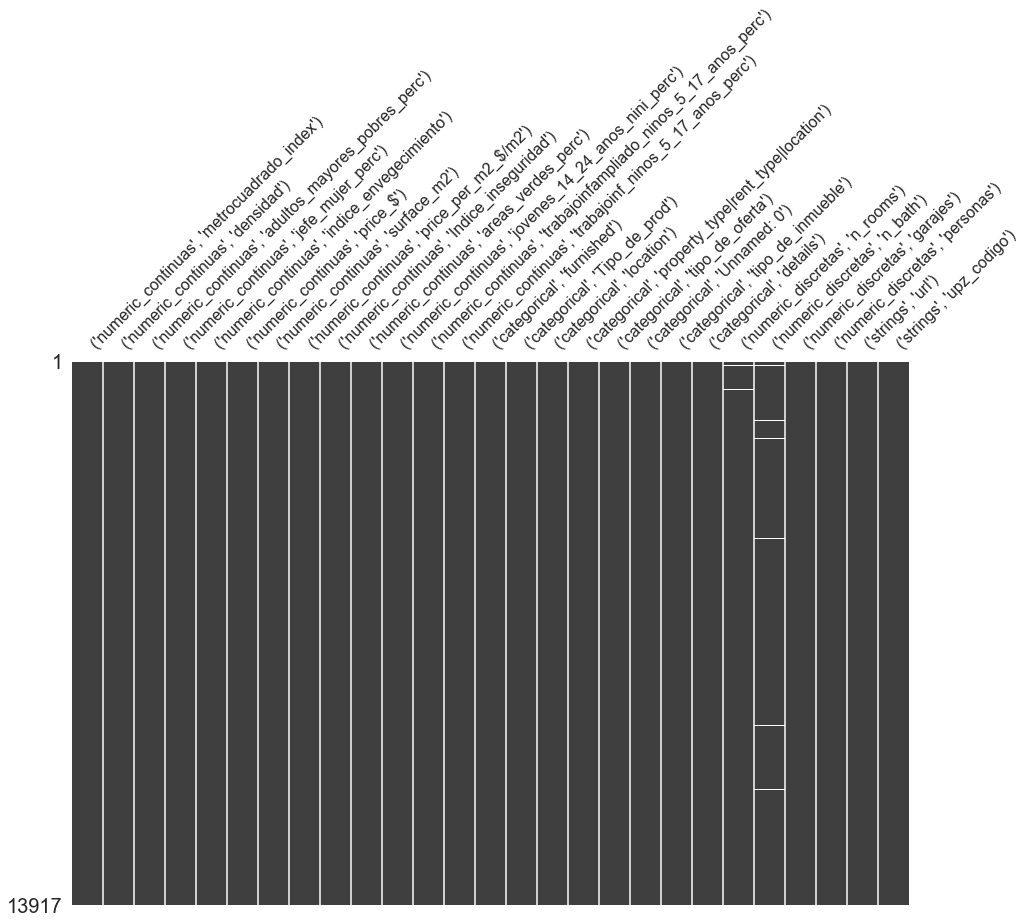

In [24]:
fig, ax = plt.subplots(1,1,figsize = [15, 10])
msno.matrix(df,ax = ax, sparkline=True)

Text(0.5, 1.0, 'Correlaciones de nulidad ')

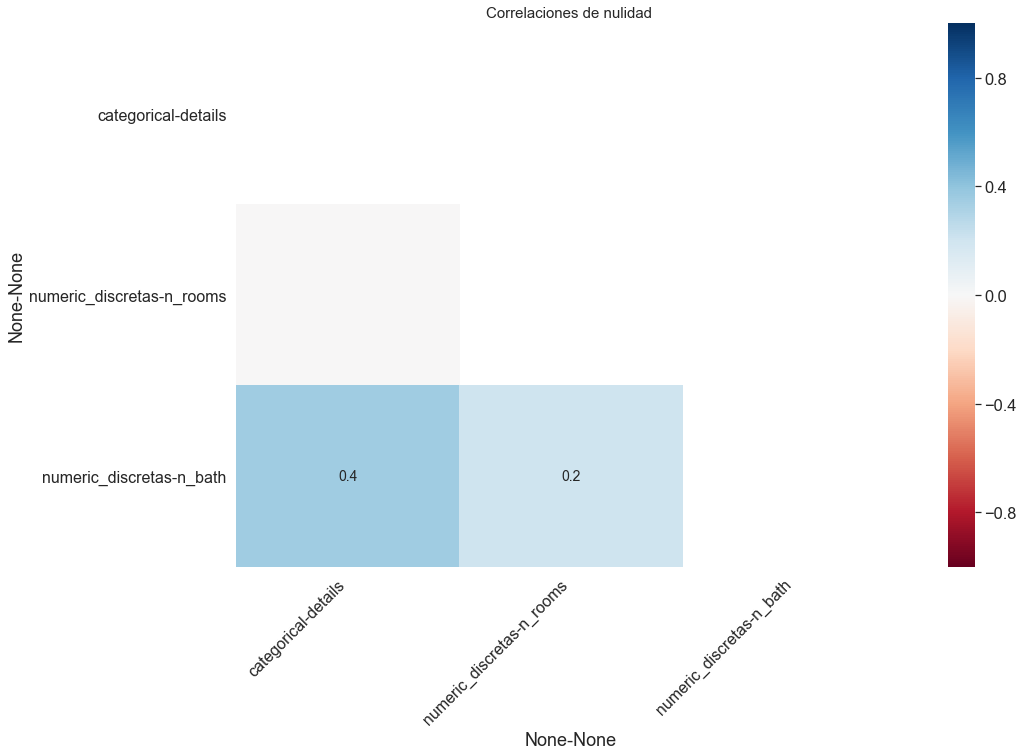

In [25]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.heatmap(df, ax = ax)
plt.title('Correlaciones de nulidad ', fontsize=15)

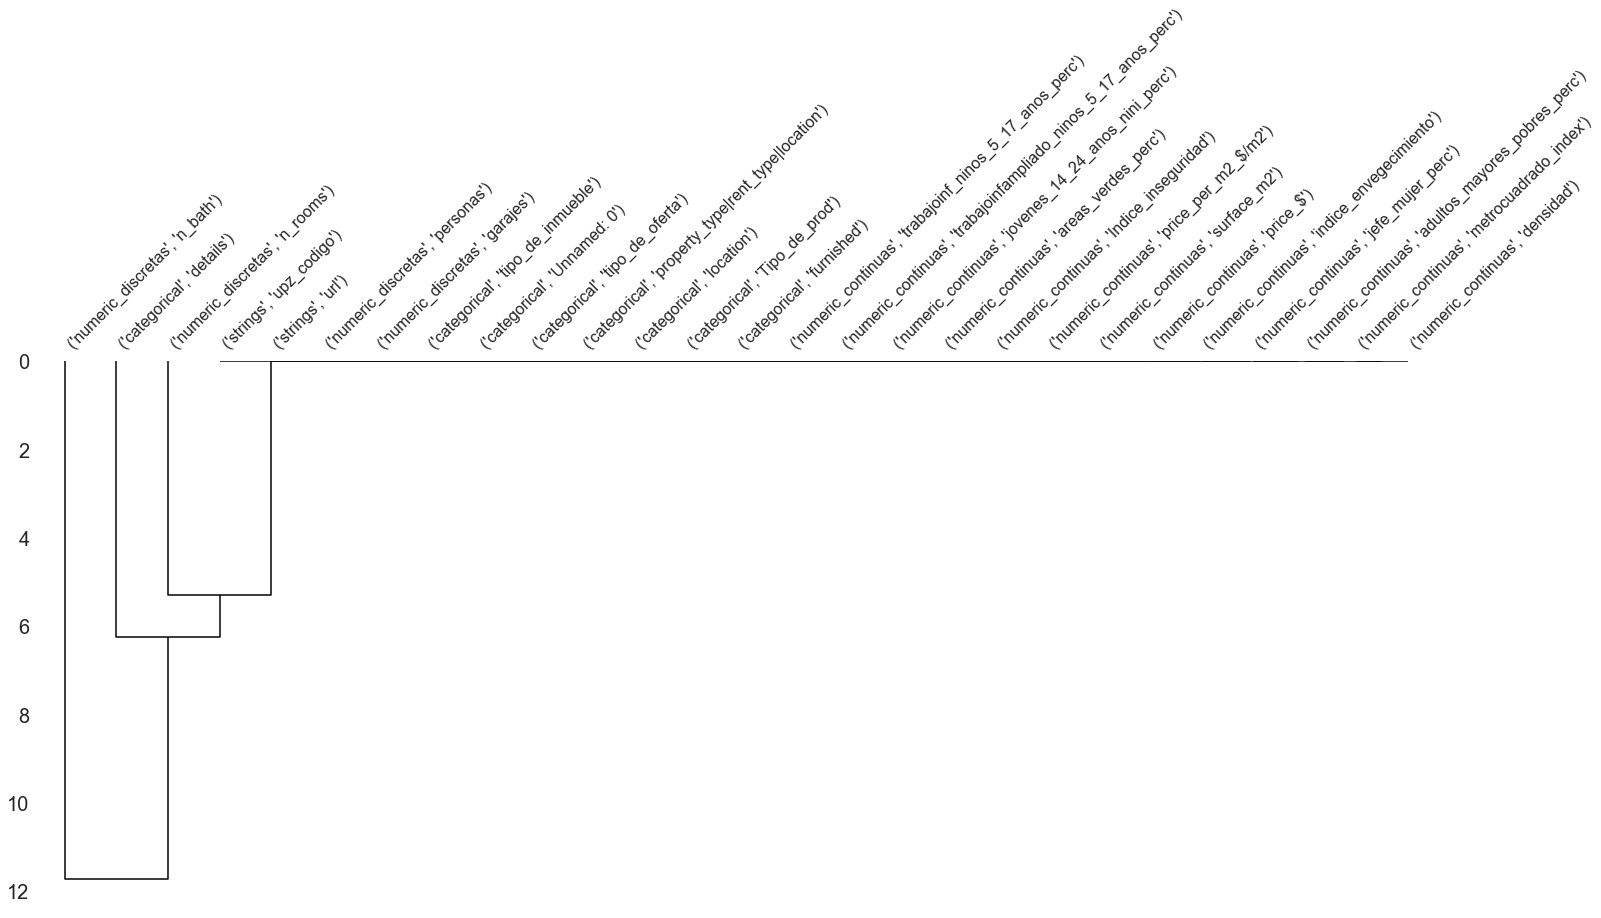

In [29]:
## se obtiene que varibales n_bath y details tienen cierta relacion, 
#en donde el hehco que que aparezca una hace que la otra este presenten en un factor de 0.4 
## idem analisis para n_bath y n_rooms con un factor de 0.2

## se obtiene dendograma
msno.dendrogram(df)

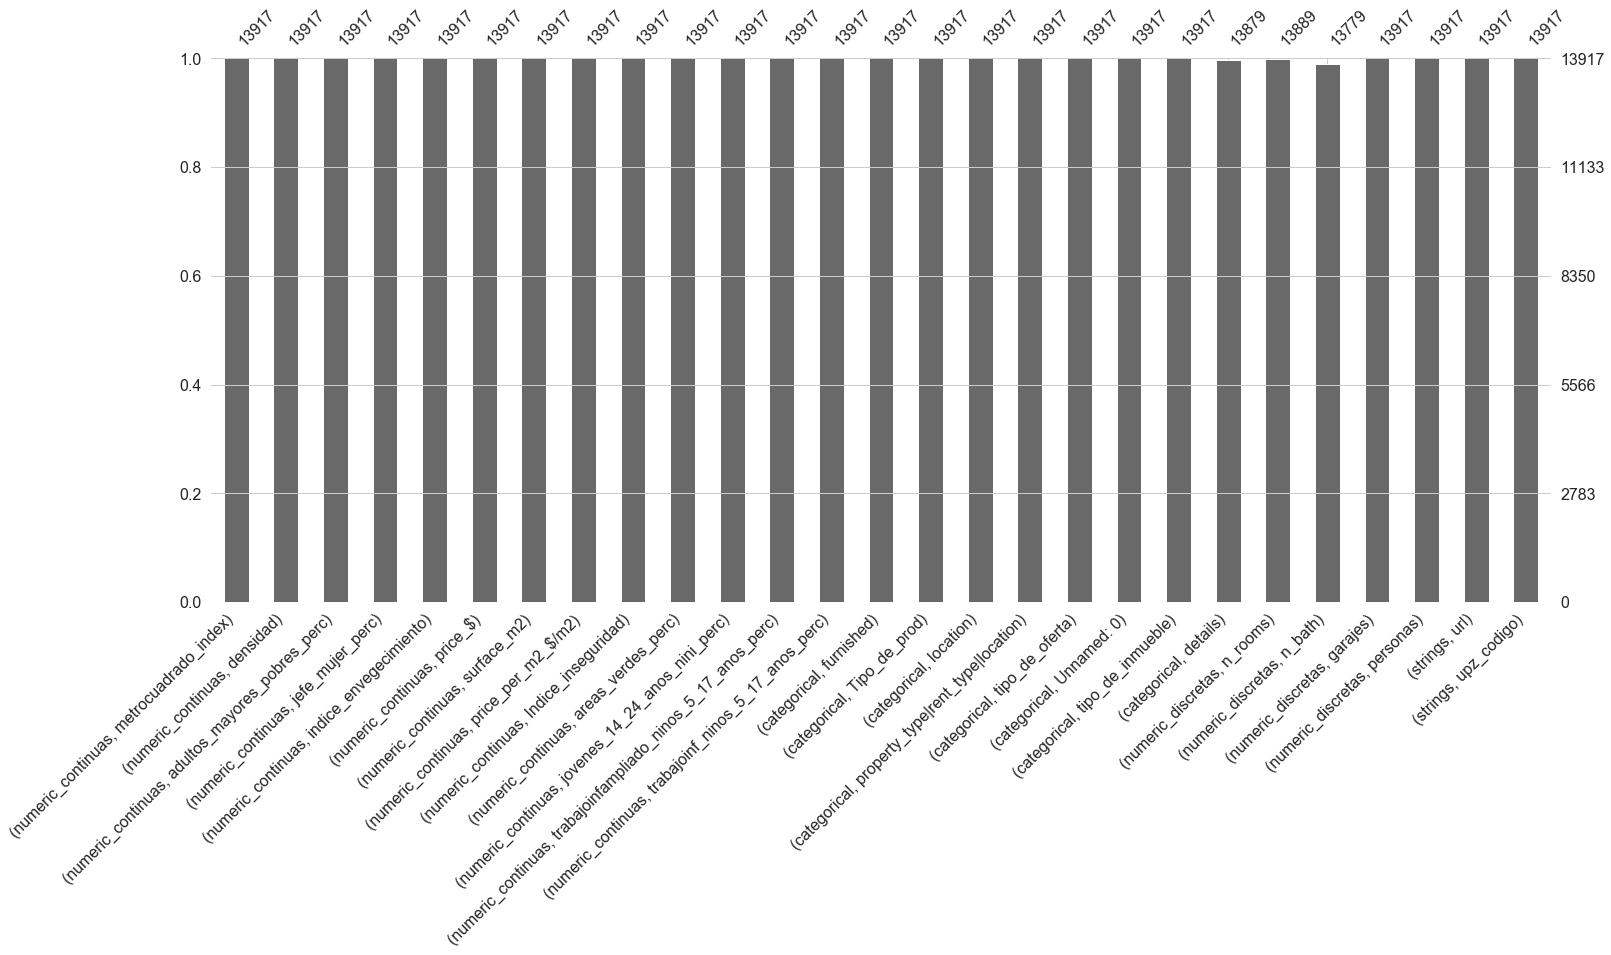

In [30]:
### COMO distribyen dichas variables
msno.bar(df)

In [31]:
##### PARTE 4